
#### Numerical Methods: Term Paper

#### Pradeeptha R Jain

### Computation of Quasi-normal Modes of Schwarzchild Black Holes using Pseudo-Spectral method.


Equation of motion for scalar, vector, and gravitational perturbations in the Schwarzschild black hole spacetime is given by
        \begin{equation}
        \frac{d^{2}\Psi_l^{s}}{d r_{*}^{2}}+\left[\omega^{2}-V(r)\right]\Psi_l^s=0
    \end{equation}
    with potential 
    \begin{equation}
        V(r)=\left(1-\frac{2M}{r}\right)\left(\frac{ l(l+1)}{r^{2}}+\frac{2M(1-s^2)}{r^3}\right)
    \end{equation}

QNM boundary conditions:

Only ingoing waves near the event horizon: $\Psi(r_{*},t)\sim e^{-i\omega(t+r_{*})}$ as $r_{*}\rightarrow{-\infty}$.

Only outgoing waves at infinity: $\Psi(r_{*},t)\sim e^{-i\omega(t-r_{*})}$ as $r_{*}\rightarrow{\infty}$.

Differential equation to solve:
\begin{equation}
(1 - u)u^3 \Phi^{"}(u) - u(u^2 - 2 i \omega)\Phi^{'}(u) + [s^2u^2 - l(l+1)u - 2i\omega]\Phi(u) = 0
\end{equation}

The behaviour of $\Phi$ is singular at spatial infinity, u = 0

Redefine 
\begin{equation}
\Phi(u) = e^{2i\omega/u}u^{-2i\omega}\phi(u)
\end{equation}
such that boundary conditions are implicitly included.

Final differential equation:
\begin{equation}
\begin{split}
&-4(1-u)u^3 \psi_s^{"}(x) +2\left[u^3 + 4iu(1-2u^2)\lambda\right]\psi_s'(x) + \\
&\left[l(l+1)u -s^2 u^2 -4i\lambda - 16u(1+u)\lambda^2\right]\psi_s(x) = 0
\end{split}
\end{equation}

where $u = (1+x)/2$ and $\lambda = \omega M = \omega/2$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
from scipy.linalg import eigvals, eig
import matplotlib.gridspec as gridspec
import warnings

warnings.filterwarnings("ignore")

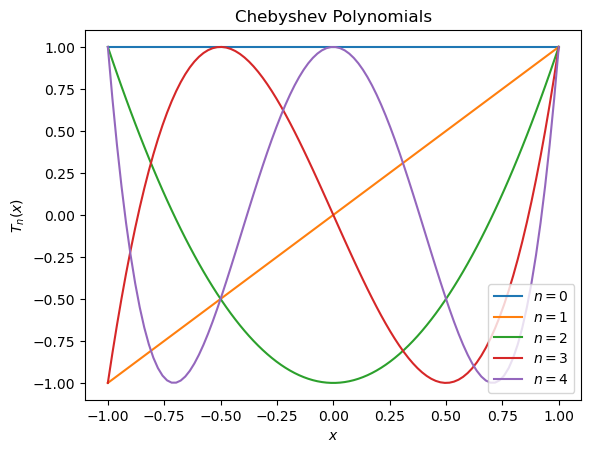

In [2]:
# Construct derivative operators for chebyshev spectral method

#Define Chebyshev polynomial 
def T_n(_x, _n):
    return np.cos(_n*np.arccos(_x))

M = 100
domain = np.linspace(-1,1, M)

# Plotting Chebyshev polynomials
plt.figure()
for i in range(5):
    plt.plot(domain, T_n(domain, i), label = f"$n = ${i}")
plt.xlabel('$x$')
plt.ylabel(r'$T_n(x)$')
plt.title('Chebyshev Polynomials')
plt.legend()
plt.show()

In [3]:
# Find colocation points
def col_pts(_N):
    points = np.arange(0, _N)*np.pi/(_N-1)
    return -np.cos(points)

Expand: $\phi(x) = \sum_{k}\tilde{\phi}_k T_k(x)$

\begin{equation}
    \int_{-1}^{1} T_k(x)T_j(x)\rho(x)\;dx = \frac{\pi}{2} \delta_{kj} \bar{c}_k
    \tag{2}
\end{equation}
where $\bar{c}_k = 2$ if $k = 0, N-1$ and equals 1 otherwise. 

$$\int_{-1}^{1} \phi(x)T_k(x)\rho(x) \;dx = \sum_{n}\tilde{\phi}_n \int_{-1}^{1}T_n(x)T_k(x)\rho(x) \;dx$$
Using Gauss-Lobatto quadrature:
$$\sum_{j} w_j T_k(x_j) u_j = \frac{\pi}{2} \bar{c}_k \tilde{u}_k$$
where $x_j$ are colocation points and $w_j = \frac{\pi}{\bar{c}_j}\frac{1}{N-1}$.
Then,
$\tilde{\phi}_k =\sum_{j} \frac{2}{\bar{c}_k\bar{c}_j}\frac{1}{N-1} T_k(x_j) \phi_j=  \sum_{j} S_{kj}\phi_j$


\begin{equation}
    S_{kj} = \frac{2}{\bar{c}_k (N-1)}\frac{1}{\bar{c}_j} T_k(x_j)
\end{equation}

and 
\begin{equation}
    \tilde{\phi} = S \phi
\end{equation}

$\phi(x) = \sum_{k}\tilde{\phi}_k T_k(x)$

$$\phi_j = \sum_{k}\tilde{\phi}_k T_k(x_j) = \sum_{k}P_{jk}\tilde{\phi}_k$$
\begin{equation}
   \phi = P \tilde{\phi}
\end{equation}
where $P_{jk} = T_k(x_j) $ and $PS = SP = I$.

In [4]:
# matrix P
def Pmatrix(_N): 
    """
    Returns matrix that transforms the coeffients of chebyshev expansion to give the function in x basis.
    
    """
    _x_n = col_pts(_N)
    pmatrix = np.zeros((_N, _N))
    for i in range(_N): 
        pmatrix[:, i] = T_n(_x_n, i) 
    return pmatrix

# matrix S
def Smatrix(_N):
    """
    Returns matrix that transforms the function to give coefficients of chebyshev expansion
    
    """
    _x_n = col_pts(_N)
    
    _c_bar = np.ones(_N)
    _c_bar[0] = 2
    _c_bar[-1] = 2
    
    smatrix = np.zeros((_N,_N))
    for i in range(_N):
        smatrix[i,:] = (2/((_N-1)*_c_bar[i]*_c_bar[:]))*T_n(_x_n[:], i)
    return smatrix


Recursion relation of Chebyshev polynomials:
\begin{align}
2T_k(x) &= \frac{T_{k+1}'}{k +1} -  \frac{T_{k-1}'}{k -1}\;\;\;\; for\;\;\; k\geq 1\\
T_0(x) &= T_{1}'(x)
\tag{3}
\end{align}

Derivative $\phi' = \sum_{j = 1}^{N-1} \tilde{\phi}_j T_{j}' = \sum_{k = 0}^{N-2} \tilde{\phi}_{k}' T_{k} $. Substituting the recursion relation in place of $T_k$ we get, 

$$c_k \tilde{\phi}'_k = \tilde{\phi}'_{k+2} + 2(k+1)\tilde{\phi}_{k+1}$$

$$\tilde{\phi}'_{N-1} = 0$$

for $k > N- 3$
$$ \tilde{\phi}'_{k} = \frac{2(k+1)}{c_k} \tilde{\phi}_{k+1}$$

where $c_k = 2$ for $k=0$ and $1$ otherwise.

Matrix equation is $$ \tilde{\phi}' = \tilde{D}\tilde{\phi} $$.

$\phi' = P \tilde{\phi}' = P\tilde{D}\tilde{\phi} = P\tilde{D}Su = Du$. Therefore, $D = P\tilde{D}S$.

$D^2 = P\tilde{D}SP\tilde{D}S = P\tilde{D}^2 S$

In [5]:
def Dtilde(N):
    """
    Returns derivative operator in Chebyshev space. 
    """
    Dtilde = np.zeros((N,N))
    _c_k = np.ones(N)
    _c_k[0] = 2

    for k in reversed(range(N-1)):
        if k <= N - 3:
            Dtilde[k, :] = 1/_c_k[k] * Dtilde[k+2, :]
        Dtilde[k, k + 1] += 2*(k+1)/_c_k[k]
    return Dtilde

def D1(_N): #first derivative
    return Pmatrix(_N) @ Dtilde(_N) @ Smatrix(_N)

def D2(_N): #second derivative
    return Pmatrix(_N) @ Dtilde(_N) @ Dtilde(_N) @Smatrix(_N)

Differential equation is of the form
\begin{equation}
c_2(x, \lambda, \lambda^2)\psi" + c_1(x, \lambda, \lambda^2)\psi'+c_0(x, \lambda, \lambda^2)\psi = 0
\end{equation}
where $c_j(x,\lambda, \lambda^2) = c_{j,0}(x) + \lambda c_{j,1}(x)+\lambda^2 c_{j,2}(x)$.

In matrix representation, the eigenvalue problem can be written as 
\begin{equation}
(M_0 + \lambda M_1 + \lambda^2 M_2)\psi_s = 0
\end{equation}
where 
\begin{equation}
\begin{split}
(M_0)_{ij} &= c_{0,0}(x_j)\delta_{ij} + c_{1,0}(x_j) D_{ij} + c_{2,0}(x_j)D_{ij}^2\\
(M_1)_{ij} &= c_{0,1}(x_j)\delta_{ij} + c_{1,1}(x_j) D_{ij} + c_{2,1}(x_j)D_{ij}^2\\
(M_2)_{ij} &= c_{0,2}(x_j)\delta_{ij} + c_{1,2}(x_j) D_{ij} + c_{2,2}(x_j)D_{ij}^2\\
\end{split}
\end{equation}
where $D$ and $D^2$ are derivative operators obtained using Chebyshev basis.

In [6]:
def Mo(_N, l, s):
    #define M0 matrix
    u = (1 + col_pts(_N))/2

    # coeffients in the differential equation
    # in matrix form
    c20 = np.diag(-4*(1-u)*u**3)
    c10 = np.diag(2*u**3) 
    c00 = np.diag(l*(l+1)*u - s**2 * u **2) 
    
    M0 = c20@D2(_N) + c10@D1(_N) + c00
    return M0

def M1(_N, l, s):  # define M1 matrix
    u = (1+col_pts(_N))/2

    # coeffients in the differential equation
    # in matrix form
    c11 = np.diag(0 + 8j*u*(1- 2*u**2)) 
    c01 = -4j*np.eye(_N, _N,dtype=np.complex_)
    _M1 = c11@D1(_N) + c01
    return _M1

def M2(_N, l, s):  #define M2 matrix

    u = (1+ col_pts(_N))/2
    
    # coeffients in the differential equation
    # in matrix form
    c02 = np.diag( - 16* u * ( 1+ u) )
    return c02

Linearize the quadratic eigenvalue problem 
\begin{equation}
\left(\tilde{M_0} + \lambda\tilde{M_1}\right).\vec{\psi} = 0
\end{equation}
where 
$
        \tilde{M_0} = \begin{pmatrix}
                            M_0 & M_1\\
                            \mathbb{0} & \mathbb{1}  
                            \end{pmatrix},\;
        \tilde{M_1} = \begin{pmatrix}
                            \mathbb{0} & M_2\\
                            -\mathbb{1} &\mathbb{0}
                      \end{pmatrix}, \;
         \vec{\psi} = \begin{pmatrix}
                            \psi\\
                              \lambda \psi
                       \end{pmatrix}
$


In [7]:
def M0_tilde(_N, l, s):
    # M0 tilde matrix
    h1_M0 = np.hstack((Mo(_N, l, s), M1(_N, l, s)))
    h2_M0 = np.hstack((np.zeros((_N,_N)),np.identity(_N)))
    M0_tilde = np.vstack((h1_M0,h2_M0))
    return M0_tilde

def M1_tilde(_N, l, s):
    # M1 tilde matrix
    h1_M1 = np.hstack((np.zeros((_N,_N)), M2(_N, l, s)))
    h2_M1 = np.hstack((-np.identity(_N),np.zeros((_N,_N))))
    M1_tilde = np.vstack((h1_M1, h2_M1))
    return M1_tilde
    

Eigenvalue equation $\tilde{M_0}\vec{\psi} = \lambda \tilde{M_1}\vec{\psi}$ can be solved using in-built scipy function *scipy.linalg.eig*.

In [8]:
def QNM_freq(_N, l, s):

    eigenv = eigvals(M0_tilde(_N,l,s), -M1_tilde(_N,l,s)) #find eigenvalues
    #eigvec = eig(M0_tilde(_N,l,s), -M1_tilde(_N,l,s), left = False, right = True)[1]
    a = np.sort_complex(eigenv) #sort the eigenvalues
    index = np.where(a == 0)[0][0] # find where zero eigenvalue is
    res = a[index+1:] # Only positive real part eigenvalues (other eigenvalues are same but with negative real part)
    return   res

In [9]:
spin = [0,1,2]

for s in spin:
    print(f'For s = {s} perturbation\n')
    l_values = np.arange(s, 5)
    for l in l_values:
        # calculate for 2 N values.
        arr1 = QNM_freq(40,l,s) 
        arr2 = QNM_freq(41,l,s)
        # Compare 2 arrays to find common eigenvalues
        output = np.flip(np.array([elem*1 for elem in arr2 if np.any(np.isclose(arr1,elem))]),0)
        print(f'l = {l}')
        for o in output:
            if o == output[-1]:
                print(f'{o}\n')
            else:
                print(o)

For s = 0 perturbation

l = 0
(0.11045506810942562-0.10489577216472848j)

l = 1
(0.2929361332671579-0.09765998891792901j)
(0.2644486908856169-0.3062574212281795j)

l = 2
(0.4836438722105643-0.0967587759787274j)
(0.4638505791467838-0.2956039370041611j)
(0.430543988121472-0.508558462863099j)

l = 3
(0.6753662325365279-0.0964996277337034j)
(0.6606714979222413-0.2922847852249581j)
(0.6336258130852156-0.49600822405620987j)
(0.5987725242618526-0.7112215444917936j)

l = 4
(0.8674156417380661-0.09639169234818983j)
(0.855808035122372-0.29087602252501227j)
(0.8336921314697667-0.4903248949339775j)
(0.8032881647939523-0.6974815303086788j)
(0.7677317667135565-0.9140179853837584j)

For s = 1 perturbation

l = 1
(0.24826326417095892-0.09248771794440816j)
(0.21451511817442243-0.29366772103898947j)

l = 2
(0.4575955116308712-0.09500442581856786j)
(0.436542385001114-0.2907101434216799j)
(0.4011869676364654-0.5015873714925116j)

l = 3
(0.6568986704624704-0.09561621792835964j)
(0.6417374359615887-0.289728

QNMs for $l >> 1$: Analytic solutions were obtained in Ref. [ferrari1984oscillations] 
\begin{equation}
\begin{split}
MRe\{\omega\} &= \frac{1}{3\sqrt{3}}\left(l + \frac{1}{2}\right)\\
MIm\{\omega\} &= -\frac{1}{3\sqrt{3}}\left(n + \frac{1}{2}\right)
\end{split}
\end{equation}

In [10]:
l_list = np.arange(0,40)
mw_r = []
mw_i = []
N_modes = []
for l in l_list:
    array1 = QNM_freq(40,l,0)
    array2 = QNM_freq(41,l,0)
    modes = np.flip(np.array([elem*1 for elem in array2 if np.any(np.isclose(array1,elem))]),0)
    result = modes[0]

    # Finding the number of modes converged at machine precision for s = 0
    N_modes.append(len(modes))
    
    mw_r.append(result.real)
    mw_i.append(result.imag)


In [11]:
y_arr = 1/(3*np.sqrt(3))*(l_list[5:] + 0.5)

n_arr1 = QNM_freq(40,30,0)
n_arr2 = QNM_freq(41,30,0)
n_depend = np.flip(np.array([elem*1 for elem in n_arr2 if np.any(np.isclose(n_arr1,elem))]),0)
n_wreal = np.real(n_depend)
n_wim = np.imag(n_depend)

n_array = np.arange(0,9)
w_analytic = -1/(3*np.sqrt(3)) * (n_array+0.5)

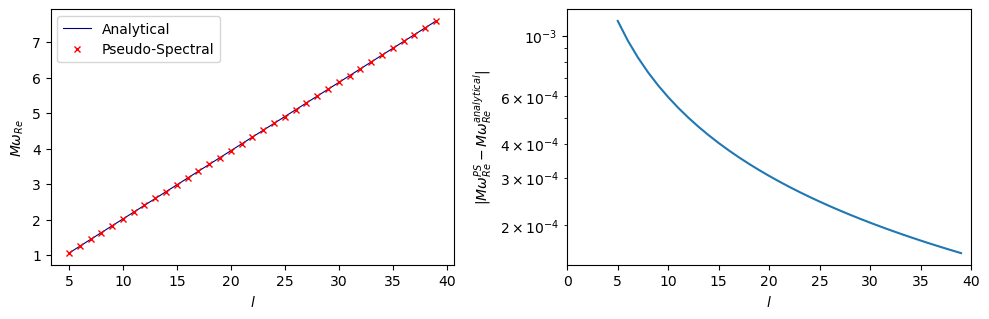

In [12]:
gs  = gridspec.GridSpec(2,2)
plt.figure(figsize=(10,6))
ax1 = plt.subplot(gs[:1,:1])
ax1.plot(l_list[5:], y_arr,'-',color = 'navy',linewidth = 0.8, label = 'Analytical')
ax1.plot(l_list[5:], mw_r[5:], 'rx',markersize = 5, label = 'Pseudo-Spectral')
ax1.set_ylabel(r'$M\omega_{Re}$')
ax1.set_xlabel('$l$')
ax1.legend()

ax2 = plt.subplot(gs[:1, 1:])
ax2.semilogy(l_list[5:], np.abs(y_arr - mw_r[5:]), '-')
ax2.set_xlim(0, 40)
ax2.set_xlabel(r'$l$')
ax2.set_ylabel(r'$|M\omega_{Re}^{PS} - M\omega_{Re}^{analytical}|$')

plt.tight_layout()
plt.savefig('new1.png', dpi= 100, bbox_inches='tight')
plt.show()

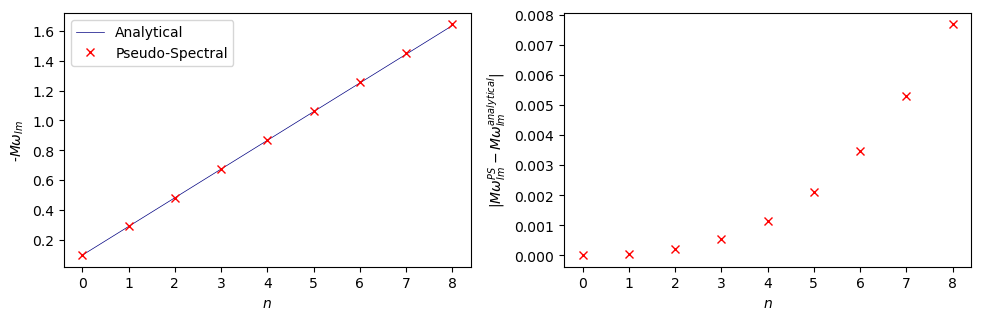

In [13]:
gs2  = gridspec.GridSpec(2,2)
plt.figure(figsize=(10,6))
ax3 = plt.subplot(gs2[:1, 1:])
ax3.plot(n_array, np.abs(w_analytic-n_wim), 'rx')
ax3.set_xlabel('$n$')
ax3.set_ylabel(r'$|M\omega_{Im}^{PS} - M\omega_{Im}^{analytical}|$')

ax4 = plt.subplot(gs2[:1,:1])
ax4.plot(n_array, -w_analytic, '-',color = 'navy',linewidth = 0.5, label = 'Analytical')
ax4.plot(n_array, -n_wim, 'rx', label = 'Pseudo-Spectral')
ax4.set_xlabel('$n$')
ax4.set_ylabel(r'-$M\omega_{Im}$')
ax4.legend()

plt.tight_layout()
plt.savefig('new2.png', dpi= 100, bbox_inches='tight')
plt.show()

In [14]:
# Studying convergence of the QNM for l=0 and s = 0
N_list = np.arange(31,65)
mw_rN = []
mw_iN = []

for n in N_list:
    freq1 = QNM_freq(n,0,0)
    freq2 = QNM_freq(n+1,0,0)
    freq_result = np.flip(np.array([elem*1 for elem in freq2 if np.any(np.isclose(freq1,elem))]),0)[0]
    mw_rN.append(freq_result.real)
    mw_iN.append(freq_result.imag)

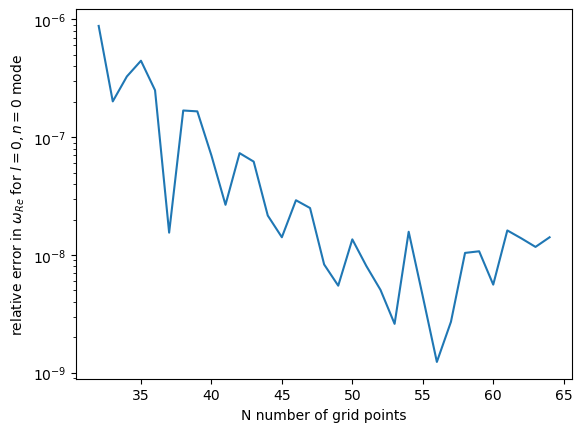

In [15]:
plt.figure()
plt.semilogy(N_list[1:], np.abs(np.diff(mw_rN)), '-')
plt.xlabel('N number of grid points')
plt.ylabel(r'relative error in $\omega_{Re}$ for $l=0, n=0$ mode')
plt.savefig('errorreal.png', dpi= 100, bbox_inches='tight')
plt.show()

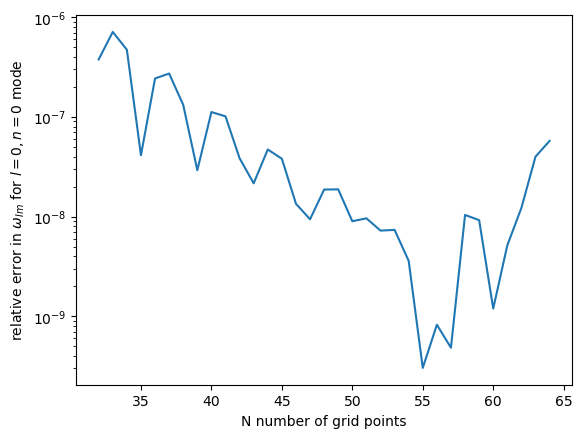

In [16]:
plt.figure()
plt.semilogy(N_list[1:], np.abs(np.diff(mw_iN)), '-')
plt.xlabel('N number of grid points')
plt.ylabel(r'relative error in $\omega_{Im}$ for $l=0, n=0$ mode')
plt.savefig('errorimag.png', dpi= 100, bbox_inches='tight')
plt.show()

The error overall decreases till $N = 55$, then starts increasing. It is not quite clear why this is could be occurring, but it is suspected to be due to the use of `scipy.linalg.eigvals` function. The discrepancy could be caused by the loss of numerical accuracy in the eigenvalue calculation due to the limitation of hardware double-precision (16- digits).
Higher working precision might be required to get more accurate results.

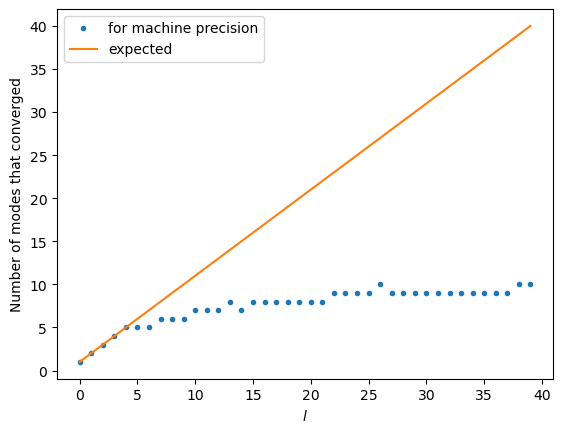

In [17]:
# Finding the number of modes converged at machine precision for s = 0
plt.figure()
plt.plot(l_list, N_modes, '.', label = 'for machine precision')
plt.plot(l_list, l_list+1, label = 'expected')
plt.xlabel('$l$')
plt.ylabel('Number of modes that converged')
plt.legend()
plt.savefig('modeconv.png', dpi= 100, bbox_inches='tight')
plt.show()